# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | villa gesell
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | arkalyk
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | antsohihy
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | bamboo flat
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | taiohae
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64


In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,13.42,99,100,6.17,CA,1731466828
1,villa gesell,-37.2639,-56.9730,13.38,66,13,4.01,AR,1731466806
2,invercargill,-46.4000,168.3500,17.23,64,2,2.24,NZ,1731466931
3,bilibino,68.0546,166.4372,-26.38,99,39,0.77,RU,1731466932
4,ancud,-41.8697,-73.8203,10.06,94,76,2.13,CL,1731466815


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,13.42,99,100,6.17,CA,1731466828
1,villa gesell,-37.2639,-56.9730,13.38,66,13,4.01,AR,1731466806
2,invercargill,-46.4000,168.3500,17.23,64,2,2.24,NZ,1731466931
3,bilibino,68.0546,166.4372,-26.38,99,39,0.77,RU,1731466932
4,ancud,-41.8697,-73.8203,10.06,94,76,2.13,CL,1731466815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

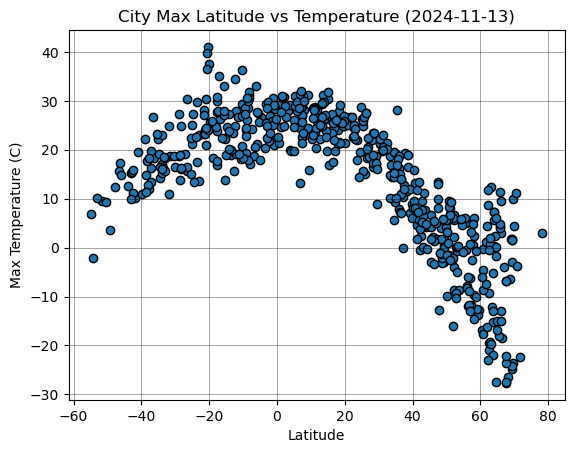

In [34]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

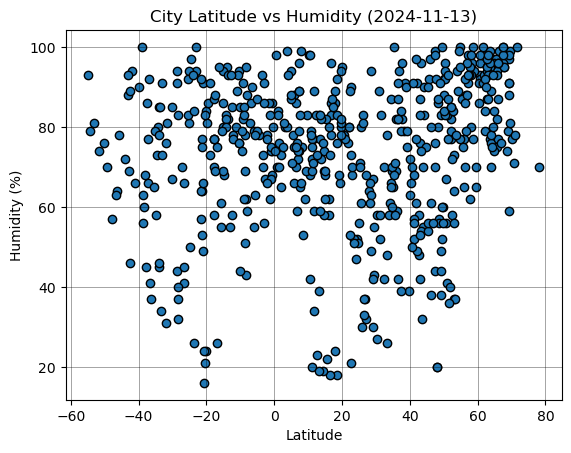

In [35]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

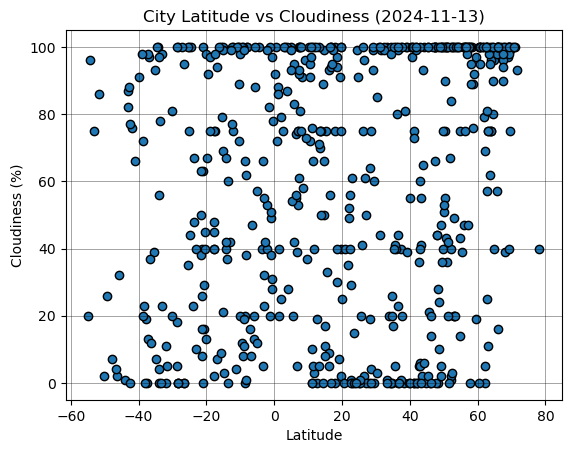

In [36]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

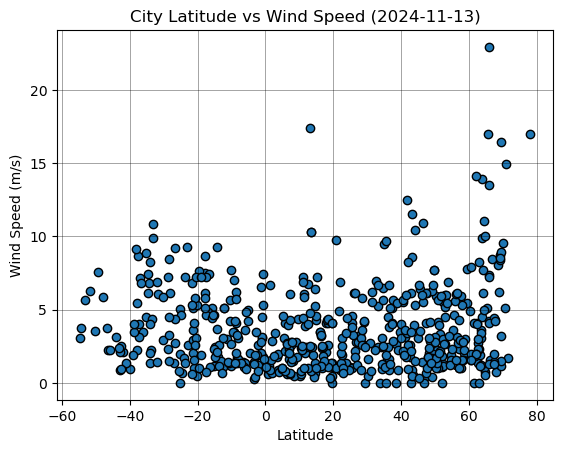

In [37]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

#create liner regression graph function to be used repetitively for each graph above; prep to run each scattor again based on northern vs southern hemisphere 
def liner_regression_plot(x_values, y_values, y_title, text_coordinates):

    #Set up linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plotting properties
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,13.42,99,100,6.17,CA,1731466828
3,bilibino,68.0546,166.4372,-26.38,99,39,0.77,RU,1731466932
7,arkalyk,50.2486,66.9114,-9.89,96,100,5.93,KZ,1731466936
8,iqaluit,63.7506,-68.5145,-15.15,77,75,3.09,CA,1731466937
9,rongelap,11.1635,166.8941,28.50,72,10,7.22,MH,1731466938


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,villa gesell,-37.2639,-56.9730,13.38,66,13,4.01,AR,1731466806
2,invercargill,-46.4000,168.3500,17.23,64,2,2.24,NZ,1731466931
4,ancud,-41.8697,-73.8203,10.06,94,76,2.13,CL,1731466815
5,port-aux-francais,-49.3500,70.2167,3.61,70,26,7.55,TF,1731466914
6,adamstown,-25.0660,-130.1015,21.08,81,100,5.07,PN,1731466935


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7640389174874613


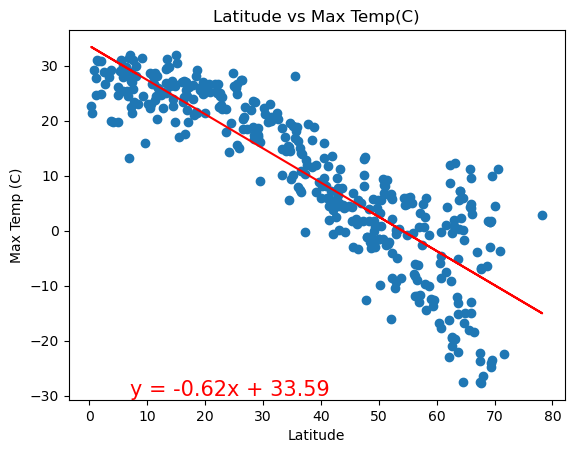

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Latitude vs Max Temp (C)")
liner_regression_plot(x_values, y_values, "Max Temp (C)", (7,-30))


The r-value is: 0.4091051529324732


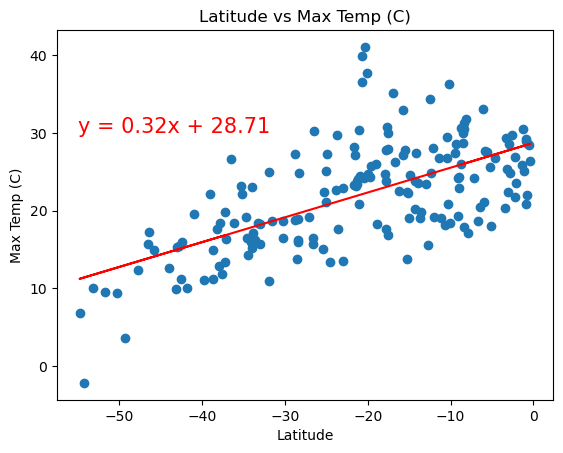

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Latitude vs Max Temp (C)")
liner_regression_plot(x_values, y_values, "Max Temp (C)", (-55,30))

**Discussion about the linear relationship:** There is a strong negative correlation between the countries' latitude and max tempertaure in the Northern Hemisphere whereas the countries in the Southern Hemisphere shows a moderately positive correlation. The closer a country is to the equator (Latitude = 0) in both Hemispheres, the more likely max temperatures increase. However, the countries in the Northern Hemisphere experience higher rate in temperature increase than the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07271313812865139


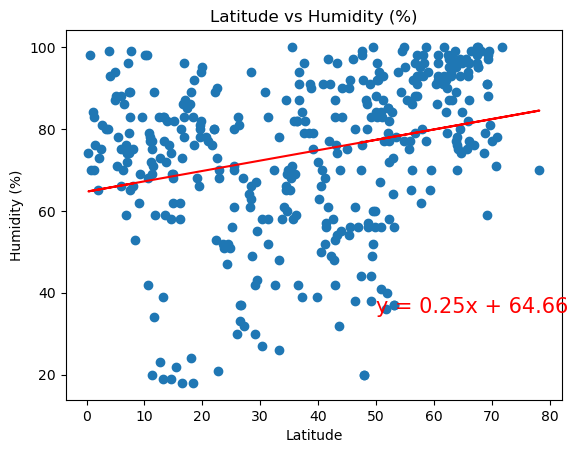

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Latitude vs Humidity (%)")
liner_regression_plot(x_values, y_values, "Humidity (%)", (50,35))

The r-value is: 0.011093992117945777


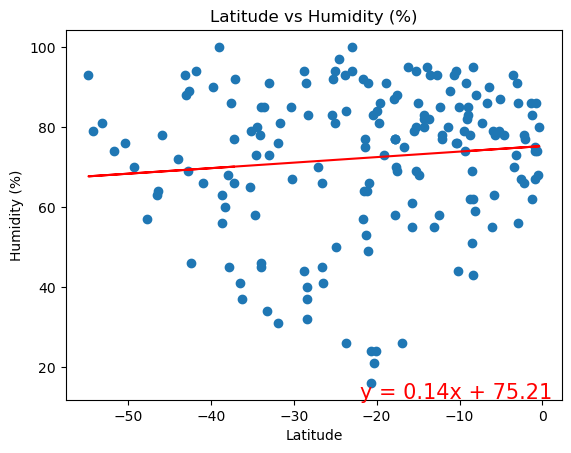

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Latitude vs Humidity (%)")
liner_regression_plot(x_values, y_values, "Humidity (%)", (-22, 12))

**Discussion about the linear relationship:** There is a strong positive correlation between the countries' Latitude and Humidity in the Northern Hemisphere whereas the countries in the Southern Hemisphere shows a very weak positive correlation. As a country's  latitude increases, the more likely their humidity increases. The Northern Hemisphere tends to have a slightly higher rate of increase in comparison to the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027703619645734052


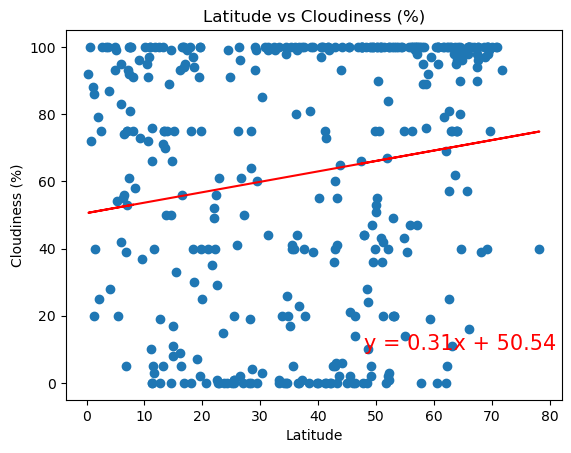

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Latitude vs Cloudiness (%)")
liner_regression_plot(x_values, y_values, "Cloudiness (%)", (48,10))

The r-value is: 0.009901570128262911


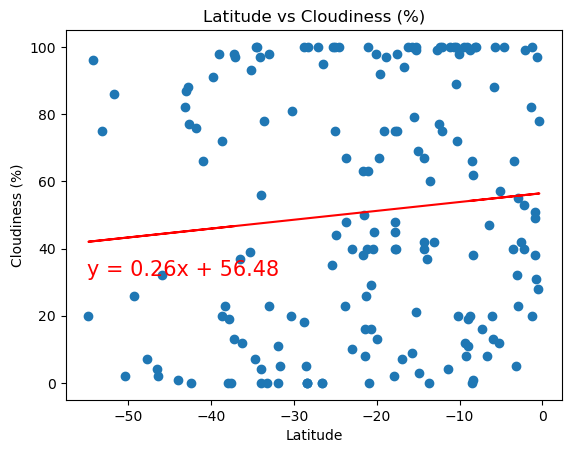

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Latitude vs Cloudiness (%)")
liner_regression_plot(x_values, y_values, "Cloudiness (%)", (-55, 32))

**Discussion about the linear relationship:** The Northern and Southern Hemispheres, have very weak correlation between the countries' Latitudes and Cloudiness. This graphs shows that percentage of cloudiness gradually increases at a slight rate as the latitude increases

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06671616611618043


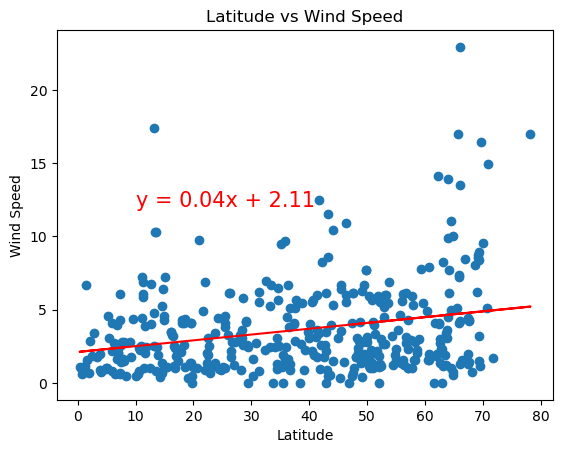

In [21]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Latitude vs Wind Speed (m/s)")
liner_regression_plot(x_values, y_values, "Wind Speed (m/s)", (10,12))

The r-value is: 0.04144210136100454


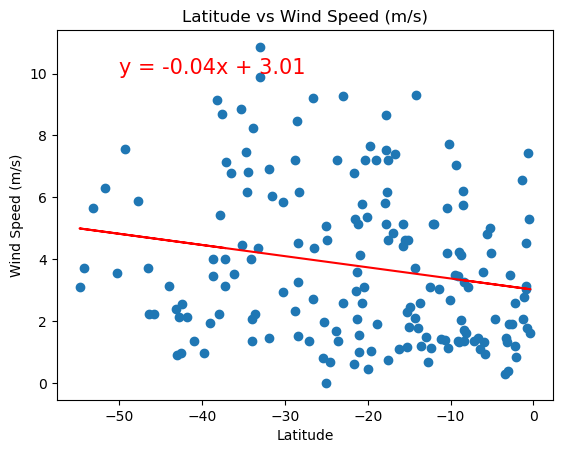

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Latitude vs Wind Speed (m/s)")
liner_regression_plot(x_values, y_values, "Wind Speed (m/s)", (-50, 10))

**Discussion about the linear relationship:** The countries in the Northern Hemisphere have very weak positive correlation between the countries' Latitude and Windspeed. Whereas, in the Southern Hemisphere there is a very weak negative correlation. The closer a country is to the equator (Latitude = 0) in both Hemispheres, the wind speed is likely to decrease slightly.